# matplotlib - plotting in Python

Richard Otis and Brandon Bocklund

Based on lectures by J. R. Johansson (jrjohansson at gmail.com)

Original versions available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
%matplotlib inline

## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that we would like to emphasize is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

*Note*: We could spend several days just on the features of Matplotlib. In the interest of time, we only touch on a few key features.

To get started using Matplotlib in a Python program, import the `matplotlib.pyplot` module under the name `plt`:

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import numpy as np

## The matplotlib object-oriented API

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

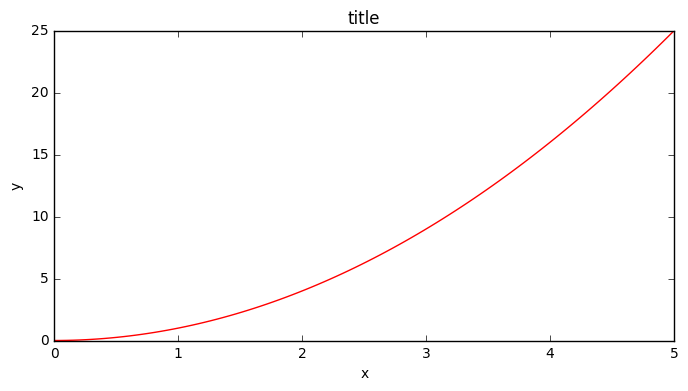

In [4]:
fig = plt.figure(figsize=(8,4), dpi=100)
ax = fig.gca()
x = np.linspace(0, 5, num=100)
y = x ** 2

ax.plot(x, y, 'r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [5]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [6]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, we recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

### Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [7]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [8]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [9]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

In [10]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [11]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

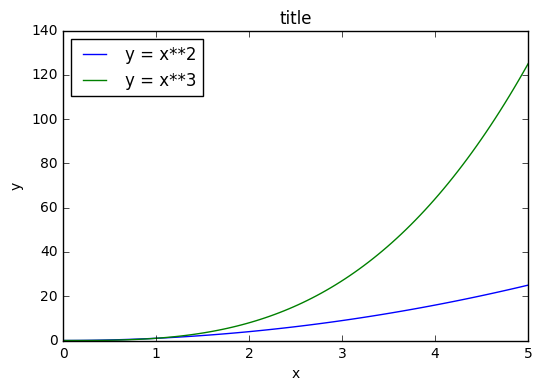

In [12]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [13]:
n = np.array([0,1,2,3,4,5])
xx = np.linspace(-0.75, 1., 100)

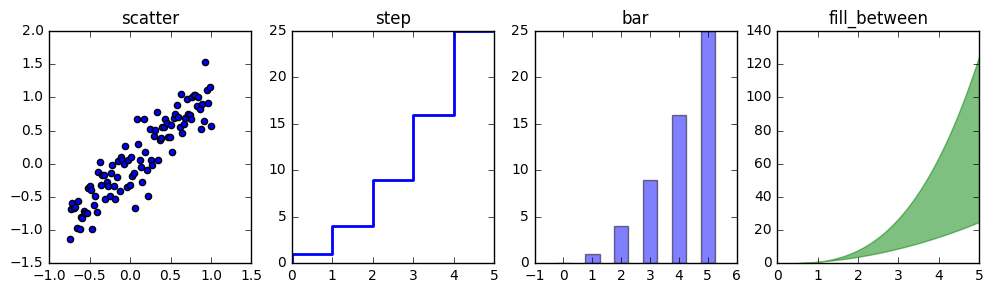

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

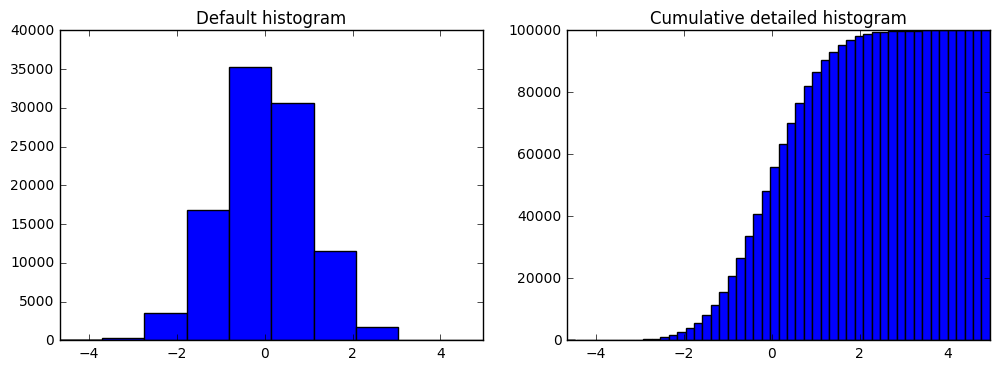

In [15]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcasing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
